<a href="https://colab.research.google.com/github/amyas-lab/Machine-Learning-Models/blob/main/Travel_Insurance_Prediction_Using_Naive_Bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. Coding Tasks

# 1.1 Load the travel-insurance.csv dataset and perform basic data cleaning, analysis and visualization to have a deep understanding about the data.  

In [ ]:
import pandas as pd
import numpy as np
df = pd.read_csv("/content/travel-insurance.csv")
df.head(n=100)

,Unnamed: 0,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,0,31,Government Sector,Yes,400000,6,1,No,No,0
1,1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0
...,...,...,...,...,...,...,...,...,...,...
95,95,26,Private Sector/Self Employed,Yes,1400000,5,0,No,Yes,1
96,96,28,Private Sector/Self Employed,Yes,700000,4,0,No,No,0
97,97,29,Private Sector/Self Employed,Yes,350000,7,0,No,No,0
98,98,29,Private Sector/Self Employed,Yes,1100000,6,0,No,No,0


This is a dataset predicting whether a customer will purchase a travel insurance.
* Age - Age of the customer (Numeric)
* Employment Type - The sector in which customer is employed (Categorical: Government sector, Private sector/ Self-employed)
* GraduateOrNot - Whether the customer is college graduate or not (Categorical: Yes, No)
* AnnualIncome - The yearly income of the customer in indian rupees (Numeric)
* FamilyMembers - Number of members in customer's family (Numeric)
* ChronicDisease - Whether the customer suffers from any major disease or conditions like diabetes/high BP or asthama, etc.(Categorical: 0 (No), 1 (Yes))
* FrequentFlyer - Derived data based on customer's history of booking air tickets on at least 4 different instances in the last 2 Years (2017-2019) (Categorical: 0 (No), 1 (Yes))
* EverTravelledAbroad - Has the customer ever travelled to a foreign country.(Categorical: Yes, No)
* TravelInsurance: (Label) Did the customer buy travel insurance package during introductory offering held in the year 2019.(Categorical: 0 (No), 1 (Yes))

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Unnamed: 0           1987 non-null   int64 
 1   Age                  1987 non-null   int64 
 2   Employment Type      1987 non-null   object
 3   GraduateOrNot        1987 non-null   object
 4   AnnualIncome         1987 non-null   int64 
 5   FamilyMembers        1987 non-null   int64 
 6   ChronicDiseases      1987 non-null   int64 
 7   FrequentFlyer        1987 non-null   object
 8   EverTravelledAbroad  1987 non-null   object
 9   TravelInsurance      1987 non-null   int64 
dtypes: int64(6), object(4)
memory usage: 155.4+ KB


In [ ]:
display(df.describe(include='all').T)

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Unnamed: 0,1987.0,NaN,NaN,NaN,993.0,573.741812,0.0,496.5,993.0,1489.5,1986.0
Age,1987.0,NaN,NaN,NaN,29.650226,2.913308,25.0,28.0,29.0,32.0,35.0
Employment Type,1987,2,Private Sector/Self Employed,1417,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GraduateOrNot,1987,2,Yes,1692,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AnnualIncome,1987.0,NaN,NaN,NaN,932762.959235,376855.684748,300000.0,600000.0,900000.0,1250000.0,1800000.0
FamilyMembers,1987.0,NaN,NaN,NaN,4.752894,1.60965,2.0,4.0,5.0,6.0,9.0
ChronicDiseases,1987.0,NaN,NaN,NaN,0.277806,0.44803,0.0,0.0,0.0,1.0,1.0
FrequentFlyer,1987,2,No,1570,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EverTravelledAbroad,1987,2,No,1607,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TravelInsurance,1987.0,NaN,NaN,NaN,0.357323,0.479332,0.0,0.0,0.0,1.0,1.0


Before proceeding with cleaning data, a careful look into the data information is important. This table points out:
- No need for data imputation (replacing missing data with substituted valeus), as all columns all have 1987 entries.
- We need to rename the column for better readability.
- We need to convert the data types of ChronicDiseases and TravelInsurance from numeric to categorical, because 0 and 1 in their columns denote No and Yes respectively, not the numeric values.
- We need to run the test to detect the outliers. As for this table, the maximum value of AnnualIncome goes up to 1,800,000, while its median is 900,000, implying the possibility of outliers. Outliers can affect negatively the performance of the model and subsequent analysis.



##1.1.1 Cleaning data
Step 1: Drop the irrelevant column "Unnamed", because it does nothing with the label.

In [ ]:
df.drop(columns=["Unnamed: 0"], inplace=True)
df

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,31,Government Sector,Yes,400000,6,1,No,No,0
1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0
...,...,...,...,...,...,...,...,...,...
1982,33,Private Sector/Self Employed,Yes,1500000,4,0,Yes,Yes,1
1983,28,Private Sector/Self Employed,Yes,1750000,5,1,No,Yes,0
1984,28,Private Sector/Self Employed,Yes,1150000,6,1,No,No,0
1985,34,Private Sector/Self Employed,Yes,1000000,6,0,Yes,Yes,1


Step 2: Rename for better readability.

In [ ]:
df.rename(columns={'Employment Type': 'Employment_Type', 'GraduateOrNot': 'Graduate_Or_Not', 'AnnualIncome': 'Annual_Income', 'FamilyMembers': 'Family_Members', 'ChronicDiseases': 'Chronic_Diseases', 'FrequentFlyer': 'Frequent_Flyer', 'EverTravelledAbroad': 'Ever_Travelled_Abroad', 'TravelInsurance': 'Travel_Insurance'}, inplace=True)
df

,Age,Employment_Type,Graduate_Or_Not,Annual_Income,Family_Members,Chronic_Diseases,Frequent_Flyer,Ever_Travelled_Abroad,Travel_Insurance
0,31,Government Sector,Yes,400000,6,1,No,No,0
1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0
...,...,...,...,...,...,...,...,...,...
1982,33,Private Sector/Self Employed,Yes,1500000,4,0,Yes,Yes,1
1983,28,Private Sector/Self Employed,Yes,1750000,5,1,No,Yes,0
1984,28,Private Sector/Self Employed,Yes,1150000,6,1,No,No,0
1985,34,Private Sector/Self Employed,Yes,1000000,6,0,Yes,Yes,1


Step 3: Convert into right data types.

In [ ]:
# Convert categorical columns to 'category' dtype
categorical_cols = ['Employment_Type', 'Graduate_Or_Not','Chronic_Diseases', 'Frequent_Flyer', 'Ever_Travelled_Abroad', 'Travel_Insurance']
for col in categorical_cols:
    df[col] = df[col].astype('category')

# Check data types after conversion
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Age                    1987 non-null   int64   
 1   Employment_Type        1987 non-null   category
 2   Graduate_Or_Not        1987 non-null   category
 3   Annual_Income          1987 non-null   int64   
 4   Family_Members         1987 non-null   int64   
 5   Chronic_Diseases       1987 non-null   category
 6   Frequent_Flyer         1987 non-null   category
 7   Ever_Travelled_Abroad  1987 non-null   category
 8   Travel_Insurance       1987 non-null   category
dtypes: category(6), int64(3)
memory usage: 59.1 KB


Step 4: Detect outliers for numeric columns.
The Interquartile Range Method confirms that numeric features in this data are relatively free of extreme values. This negates the worry about extreme values significantly impacting the performance and analysis of Naive Bayes Model.

In [ ]:
def detect_outliers_iqr(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower) | (df[col] > upper)]
    return outliers

for col in df.columns:
    if pd.api.types.is_numeric_dtype(df[col]):
        outliers = detect_outliers_iqr(df, col)
        print(f"{col}: {len(outliers)} outliers")
    else:
        print(f"{col}: Not a numeric column, skipping outlier detection.")

Age: 0 outliers
Employment_Type: Not a numeric column, skipping outlier detection.
Graduate_Or_Not: Not a numeric column, skipping outlier detection.
Annual_Income: 0 outliers
Family_Members: 0 outliers
Chronic_Diseases: Not a numeric column, skipping outlier detection.
Frequent_Flyer: Not a numeric column, skipping outlier detection.
Ever_Travelled_Abroad: Not a numeric column, skipping outlier detection.
Travel_Insurance: Not a numeric column, skipping outlier detection.


## 1.1.2 Data Visualization
Overall, this section provides a visual exploration of the dataset to understand the distributions of individual features, the relationships between features, and importantly, how different features relate to the target variable, 'Travel_Insurance'. Through various plots like bar charts, histograms, KDE plots, stacked bar charts, box plots, and a correlation heatmap, I aim to:

1.  **Analyze the distribution of both categorical and numerical features (Univariate Analysis).**
2.  **Examine the relationships between features and the target variable (Bivariate Analysis), specifically investigating how different feature values influence the likelihood of purchasing travel insurance.**
3.  **Identify potential correlations between numerical features (Multivariate Analysis).**

The insights gained from these visualizations will help guide subsequent steps in the modeling process.


### **Univariate Analysis**

This subsection explores the distribution of each feature in the travel insurance dataset individually. We will visualize the frequency or density of values for both the categorical features (Employment Type, Graduate Or Not, Chronic Diseases, Frequent Flyer, Ever Travelled Abroad) and the numerical features (Age, Annual Income, Family Members) to understand their characteristics and identify any notable patterns or imbalances.

###**Bar charts for the distribution of Age and Family_Members:**
**The purpose** of the two bar charts is  help us understand better the demographics of the dataset. In particular:
- This first chart shows that surveyed individuals are all in the age range from 25 to 35, with the majority being 28 years old.

/tmp/ipython-input-3851856844.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Age', palette='viridis')


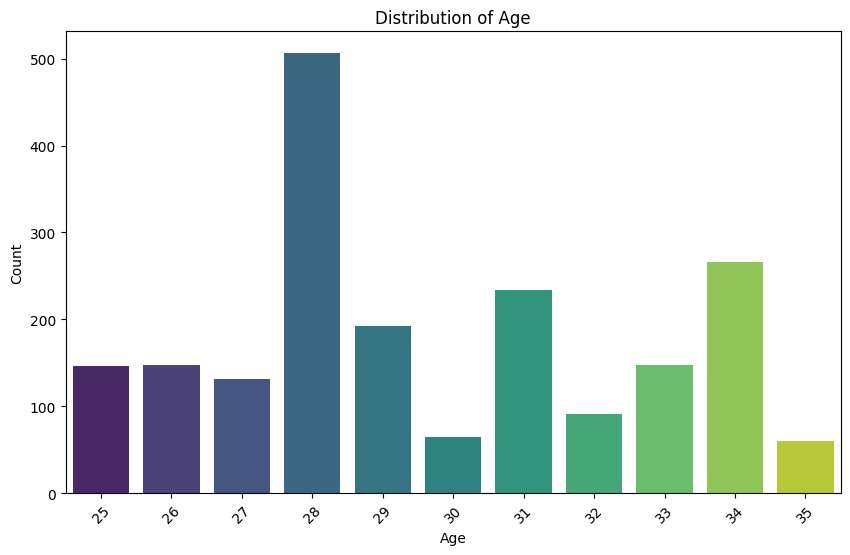

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Count plot for Age
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Age', palette='viridis')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.xticks(rotation=45) # Rotate x-axis labels if they overlap
plt.show()

This second chart indicate individuals in the dataset have between 2 and 6 family members.

/tmp/ipython-input-2939849547.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Family_Members', palette='viridis')


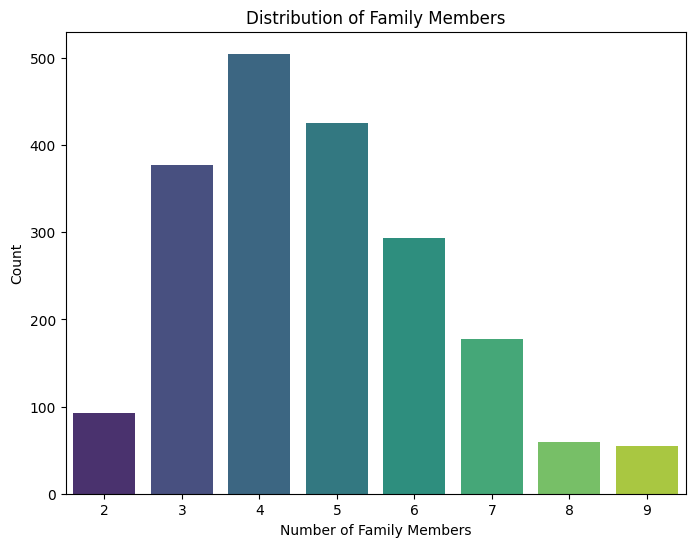

In [ ]:
# Count plot for Family_Members
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Family_Members', palette='viridis')
plt.title('Distribution of Family Members')
plt.xlabel('Number of Family Members')
plt.ylabel('Count')
plt.show()

**Interesting observation:** These charts (Distribution of Age and Distribution of Family Members) show that the dataset represents a specific segment of the population, primarily focusing on individuals between 25 and 35 years old with 2 to 6 family members. This suggests the data is not uniformly representative of all age groups or family sizes.

###**Bar chart for the distribution target feature Travel_Insurance**

**The purpose** of the bar chart for "Travel_Insurance" is to identify if there is any class imbalance in place.

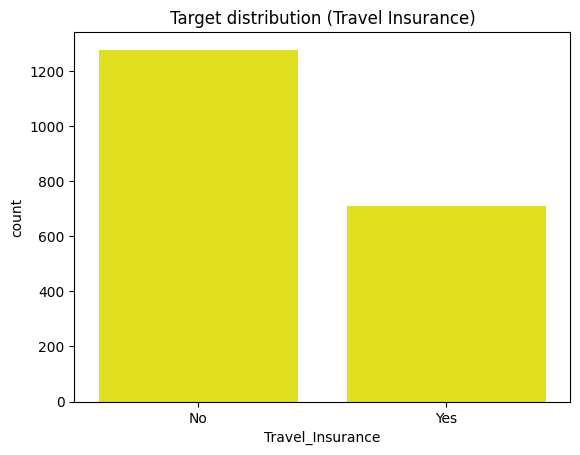

In [ ]:
sns.countplot(data=df, x="Travel_Insurance", color = "yellow")
plt.title("Target distribution (Travel Insurance)")
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

**Interesting Observation:**

 From the bar chart, it is evident that there is a significant class imbalance in the target variable 'Travel_Insurance'. The number of customers who did not purchase travel insurance (Class 0) far outweighs those who did (Class 1), with approximately 1300 'No' entries compared to around 700 'Yes' entries. This imbalance poses a significant warning for model training and evaluation.

Specifically, with a limited number of examples for the minority class, a model may struggle to learn its characteristics effectively, potentially leading to good overall accuracy but poor performance (precision, recall, F1-score) on the minority class. Additionally, the issue of zero probability for unseen feature combinations is more likely to occur in the minority class, which can negatively impact Naive Bayes models.

Potential solutions to address this class imbalance include:

*   Using appropriate evaluation metrics: Focusing on metrics like precision, recall, and F1-score, which provide a more nuanced view of performance on imbalanced datasets, rather than solely relying on accuracy.
*   Resampling techniques: Employing techniques such as oversampling the minority class or undersampling the majority class to create a more balanced training set..
*   Laplace smoothing: Applying Laplace smoothing can help mitigate the zero probability issue in Naive Bayes by adding a small value to the counts.

But further exploration is needed to determine the solutions to be applied.

### **Histogram + Kernal Density Estimate for the distribution of Annual_Income**

**The purpose** of the histogram and Kernel Density Estimate (KDE) is:.

*   The histogram shows the frequency of 'Annual_Income' values within specified bins, providing a bar-based representation of the data distribution.
*   The KDE plot provides a smoothed continuous curve that estimates the probability density function of 'Annual_Income'. It helps to visualize the shape of the distribution, identify modes (peaks), and assess skewness more clearly than a histogram alone, especially in identifying potential subgroups or unusual patterns in the income data.


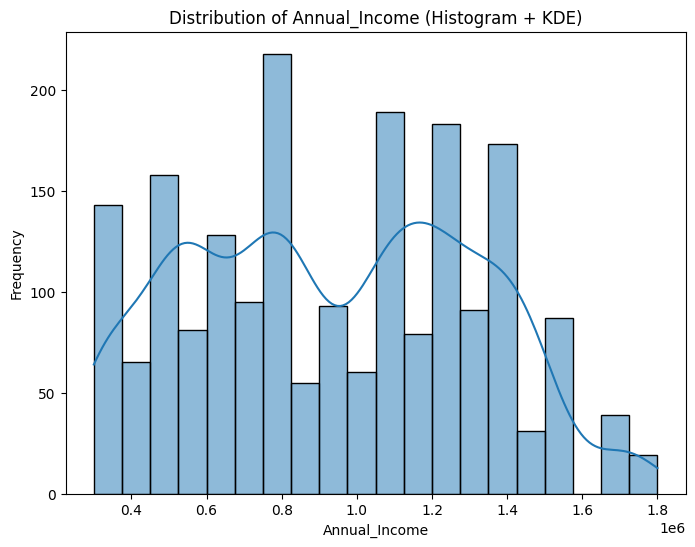

In [ ]:
# Filter for only Annual_Income for the histogram
numerical_cols_income = ['Annual_Income']

for col in numerical_cols_income:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=df, x=col, kde=True, bins=20)
    plt.title(f'Distribution of {col} (Histogram + KDE)')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

**Interesting Observation:** Both the histogram and KDE shows multiple modes (peaks), indicating there might be different subgroups here (such as customer segments or job roles). It is slightly skewed to the right, implying there are few individuals with significant higher income than the majority (around 1,800,000).

### **Bivariate Analysis**

### **Stacked bar charts between Categorical features and the target variable 'Travel_Insurance'**

**The purpose** of these stacked bar charts is to visualize the relationship between each categorical feature and the target variable, 'Travel_Insurance'. By showing the proportion of customers who bought or did not buy travel insurance within each category of a feature (such Employment Type or Frequent Flyer), we can identify which categories are more likely to be associated with purchasing travel insurance. This helps us understand the potential predictive power of each categorical feature.

**Interesting Observations from the Stacked bar charts:**

*   Employment Type: Customers employed in the 'Private Sector/Self Employed' appear to have a higher propensity to purchase travel insurance compared to those in the 'Government Sector'.
*   Graduate or Not: There seems to be no significant difference in the proportion of travel insurance buyers between customers who are graduates and those who are not. Educational status does not appear to be a strong indicator in this dataset.
*   Chronic Diseases: Similar to educational status, having a chronic disease or not does not seem to have a notable impact on the likelihood of buying travel insurance.
*   Frequent Flyer: Customers identified as 'Frequent Flyers' are considerably more likely to have purchased travel insurance than those who are not frequent flyers.
*   Ever Travelled Abroad: Customers who have previously travelled abroad show a significantly higher rate of purchasing travel insurance compared to those who have not. This suggests prior international travel experience is a strong indicator.

These observations highlight that 'Employment Type', 'Frequent Flyer', and 'Ever Travelled Abroad' are potentially more influential categorical features for predicting travel insurance purchase than 'Graduate or Not' and 'Chronic Diseases'.

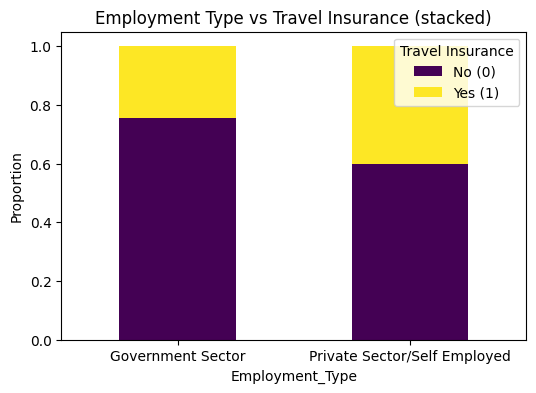

In [ ]:
# Stacked bar chart for Employment_Type
ct_employment = pd.crosstab(df['Employment_Type'], df['Travel_Insurance'], normalize='index')
ct_employment.plot(kind='bar', stacked=True, figsize=(6, 4), colormap='viridis')
plt.title('Employment Type vs Travel Insurance (stacked)')
plt.ylabel('Proportion')
plt.xticks(rotation='horizontal')
plt.legend(title='Travel Insurance', labels=['No (0)', 'Yes (1)'])
plt.show()

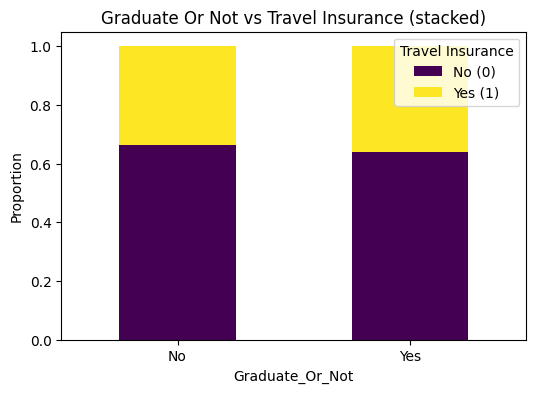

In [ ]:
# Stacked bar chart for Graduate_Or_Not
ct_graduate = pd.crosstab(df['Graduate_Or_Not'], df['Travel_Insurance'], normalize='index')
ct_graduate.plot(kind='bar', stacked=True, figsize=(6, 4), colormap='viridis')
plt.title('Graduate Or Not vs Travel Insurance (stacked)')
plt.ylabel('Proportion')
plt.xticks(rotation='horizontal')
plt.legend(title='Travel Insurance', labels=['No (0)', 'Yes (1)'])
plt.show()

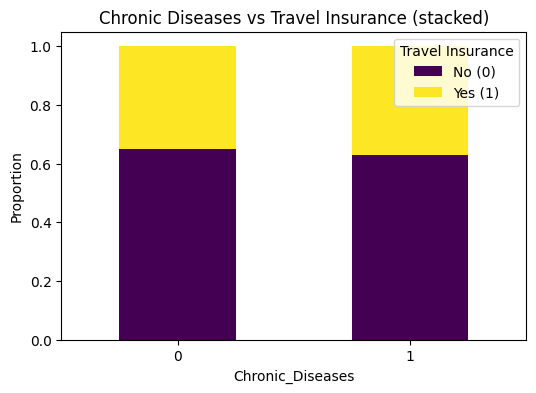

In [ ]:
# Stacked bar chart for Chronic_Diseases
ct_chronic = pd.crosstab(df['Chronic_Diseases'], df['Travel_Insurance'], normalize='index')
ct_chronic.plot(kind='bar', stacked=True, figsize=(6, 4), colormap='viridis')
plt.title('Chronic Diseases vs Travel Insurance (stacked)')
plt.ylabel('Proportion')
plt.xticks(rotation='horizontal')
plt.legend(title='Travel Insurance', labels=['No (0)', 'Yes (1)'])
plt.show()

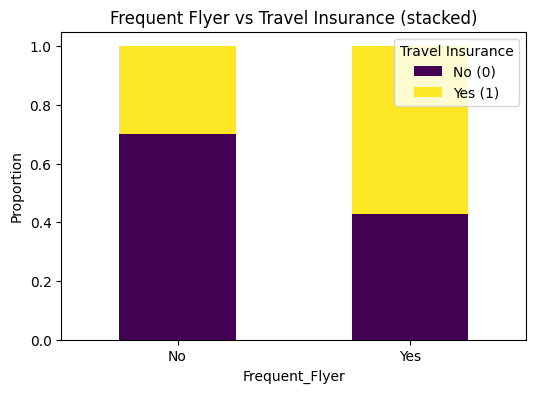

In [ ]:
# Stacked bar chart for Frequent_Flyer
ct_flyer = pd.crosstab(df['Frequent_Flyer'], df['Travel_Insurance'], normalize='index')
ct_flyer.plot(kind='bar', stacked=True, figsize=(6, 4), colormap='viridis')
plt.title('Frequent Flyer vs Travel Insurance (stacked)')
plt.ylabel('Proportion')
plt.xticks(rotation='horizontal')
plt.legend(title='Travel Insurance', labels=['No (0)', 'Yes (1)'])
plt.show()

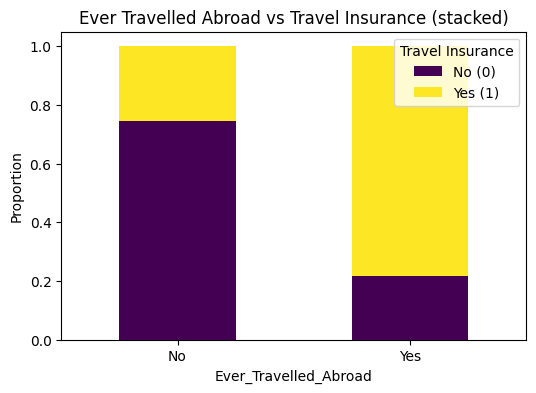

In [ ]:
# Stacked bar chart for Ever_Travelled_Abroad
ct_abroad = pd.crosstab(df['Ever_Travelled_Abroad'], df['Travel_Insurance'], normalize='index')
ct_abroad.plot(kind='bar', stacked=True, figsize=(6, 4), colormap='viridis')
plt.title('Ever Travelled Abroad vs Travel Insurance (stacked)')
plt.ylabel('Proportion')
plt.xticks(rotation='horizontal')
plt.legend(title='Travel Insurance', labels=['No (0)', 'Yes (1)'])
plt.show()

### **Box plots between Numerical Features and the target variable 'Travel Insurance**
The purpose of these box plots is to visualize the distribution of numerical features ('Age', 'Annual Income', and 'Family Members') in relation to the target variable, 'Travel Insurance'. Box plots are useful for comparing the spread and central tendency of a numerical variable across different categories of a categorical variable. By examining these plots, we can see if there are noticeable differences in the distribution of age, income, or family size between customers who bought travel insurance and those who did not. This helps to identify potential numerical features that are good discriminators for predicting travel insurance purchases.

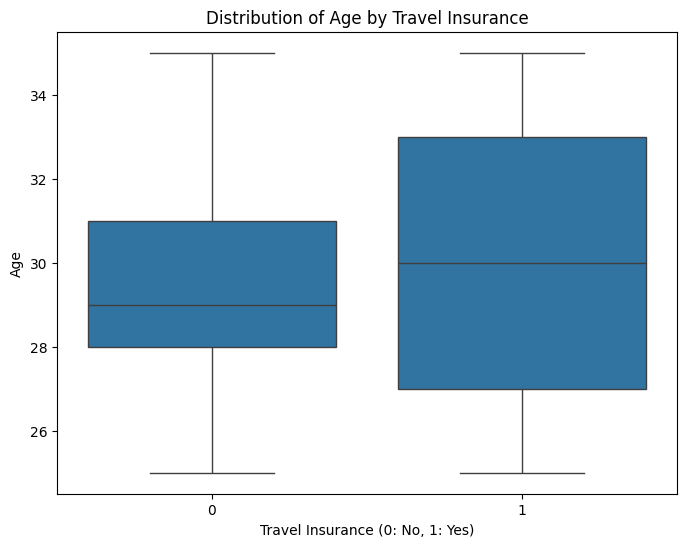

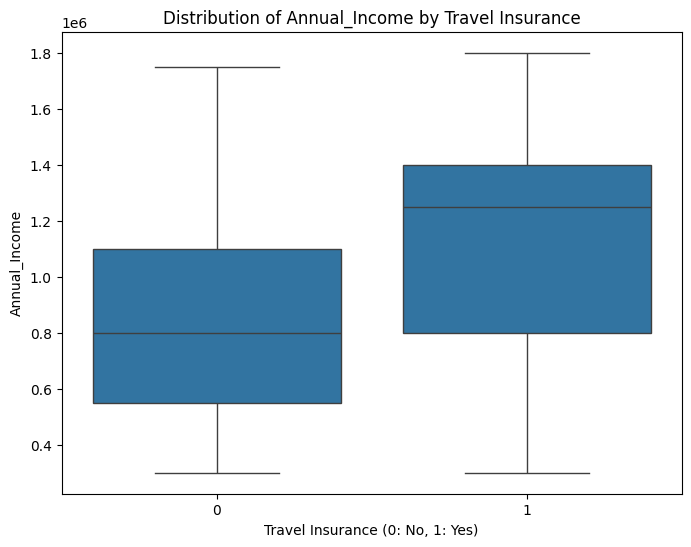

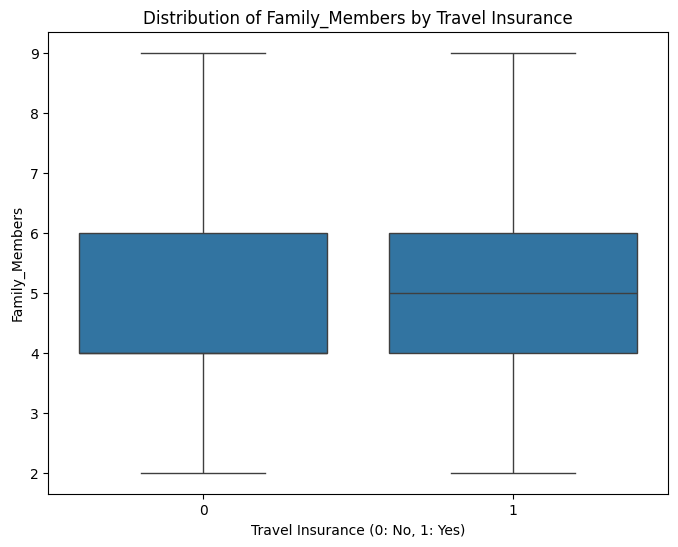

In [ ]:
numerical_cols = ['Age', 'Annual_Income', 'Family_Members']

for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=df, x='Travel_Insurance', y=col)
    plt.title(f'Distribution of {col} by Travel Insurance')
    plt.xlabel('Travel Insurance (0: No, 1: Yes)')
    plt.ylabel(col)
    plt.show()

**Interesting Observations from Box Plots:**

*   **Age:** The box plot for 'Age' shows that the median age and the overall distribution are quite similar for both customers who bought travel insurance and those who did not. This suggests that age within the range present in this dataset (25-35) might not be a strong differentiator for travel insurance purchase.
*   **Annual Income:** The box plot for 'Annual Income' reveals a noticeable difference. Customers who bought travel insurance tend to have a higher median annual income and a higher interquartile range compared to those who did not. This supports the idea that higher income might be associated with a higher likelihood of purchasing travel insurance.
*   **Family Members:** The box plot for 'Family Members' shows that the distributions are quite similar for both groups. The median number of family members is close for both buyers and non-buyers, and the spread of the data is also comparable. This indicates that the number of family members might not be a significant factor in the decision to purchase travel insurance in this dataset.

These observations align with some of the insights gained from the stacked bar charts, particularly regarding the potential importance of income.

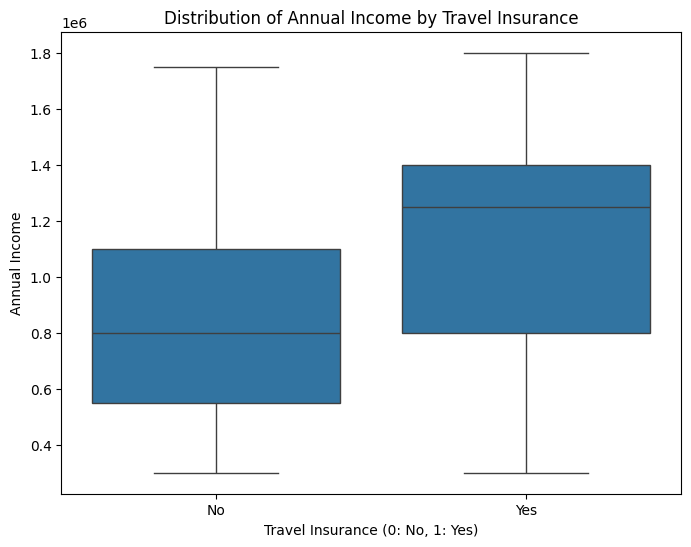

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Box plot for Annual_Income vs Travel_Insurance
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Travel_Insurance', y='Annual_Income')
plt.title('Distribution of Annual Income by Travel Insurance')
plt.xlabel('Travel Insurance (0: No, 1: Yes)')
plt.ylabel('Annual Income')
plt.xticks([0, 1], ['No', 'Yes']) # Set custom tick labels on the x-axis
plt.show()

### **Multivariate Analysis**

**Heatmap of correlations**

The purpose of this heat map is to:
- Compare the extent of that each of the numeric feature is correlated to the target variable 'Travel_Insurance'.
- Identify if there is any dependencies among variables.

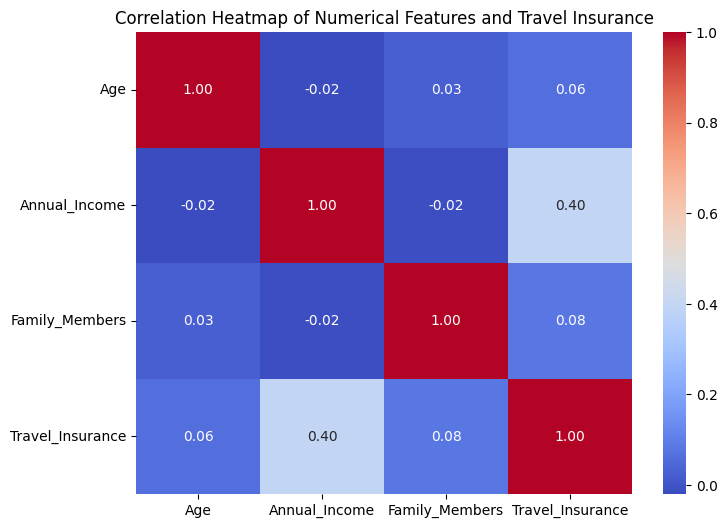

In [ ]:
# Select only the numerical columns and the target variable
# Convert 'Travel_Insurance' to numeric for correlation calculation
numerical_and_target_df = df[['Age', 'Annual_Income', 'Family_Members', 'Travel_Insurance']].copy()
numerical_and_target_df['Travel_Insurance'] = numerical_and_target_df['Travel_Insurance'].astype(int)


# Calculate the correlation matrix
correlation_matrix = numerical_and_target_df.corr()

# Generate the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Features and Travel Insurance')
plt.show()

**Interesting Observations from the Correlation Heatmap:**

*   Annual Income and Travel Insurance: There is a moderate positive correlation (approximately 0.40) between 'Annual Income' and 'Travel Insurance'. This indicates that customers with higher annual incomes tend to be more likely to purchase travel insurance, which aligns with the observations from the box plots and KDE plots.
*   Family Members and Travel Insurance: There is a weak positive correlation (approximately 0.08) between 'Family Members' and 'Travel Insurance'. This suggests a very slight tendency for customers with more family members to buy insurance, but the relationship is not strong.
*   Age and Travel Insurance: There is a weak positive correlation (approximately 0.06) between 'Age' and 'Travel Insurance'. Similar to 'Family Members', this indicates a very weak relationship, suggesting that age within this dataset's range (25-35) is not a strong predictor of travel insurance purchase.
*   Correlations between Numerical Features: The correlations between the numerical features themselves ('Age', 'Annual Income', 'Family Members') are all very close to zero, indicating a lack of strong linear relationships between these features. This is a positive finding for Naive Bayes, as it suggests the independence assumption might hold better for these numerical features, although dependencies with categorical features should still be considered.

#**1.2 Preprocess the data for modeling; divide the data into training and test sets with a suitable ratio (e.g., 80/20) to ensure unbiased model evaluation.**

Need one-hot encoding to convert categorical features into binary values so that the machine learning model can process them.

In [ ]:
# Select categorical columns for one-hot encoding
categorical_cols = ['Employment_Type', 'Graduate_Or_Not', 'Chronic_Diseases', 'Frequent_Flyer', 'Ever_Travelled_Abroad']

# Perform one-hot encoding
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Display the first few rows of the encoded dataframe and its data types
display(df_encoded.head())
display(df_encoded.dtypes)

,Age,Annual_Income,Family_Members,Travel_Insurance,Employment_Type_Private Sector/Self Employed,Graduate_Or_Not_Yes,Chronic_Diseases_1,Frequent_Flyer_Yes,Ever_Travelled_Abroad_Yes
0,31,400000,6,0,False,True,True,False,False
1,31,1250000,7,0,True,True,False,False,False
2,34,500000,4,1,True,True,True,False,False
3,28,700000,3,0,True,True,True,False,False
4,28,700000,8,0,True,True,True,True,False


,0
Age,int64
Annual_Income,int64
Family_Members,int64
Travel_Insurance,category
Employment_Type_Private Sector/Self Employed,bool
Graduate_Or_Not_Yes,bool
Chronic_Diseases_1,bool
Frequent_Flyer_Yes,bool
Ever_Travelled_Abroad_Yes,bool


In [ ]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = df_encoded.drop('Travel_Insurance', axis=1)
y = df_encoded['Travel_Insurance']

# Split data into training and test sets (80/20 ratio)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=True)

print("Training set shapes:")
print("X_train:", X_train.shape)
print("y_train:", y_train.shape)
print("\nTest set shapes:")
print("X_test:", X_test.shape)
print("y_test:", y_test.shape)

Training set shapes:
X_train: (1589, 8)
y_train: (1589,)

Test set shapes:
X_test: (398, 8)
y_test: (398,)


In [ ]:
df_encoded

,Age,Annual_Income,Family_Members,Travel_Insurance,Employment_Type_Private Sector/Self Employed,Graduate_Or_Not_Yes,Chronic_Diseases_1,Frequent_Flyer_Yes,Ever_Travelled_Abroad_Yes
0,31,400000,6,0,False,True,True,False,False
1,31,1250000,7,0,True,True,False,False,False
2,34,500000,4,1,True,True,True,False,False
3,28,700000,3,0,True,True,True,False,False
4,28,700000,8,0,True,True,True,True,False
...,...,...,...,...,...,...,...,...,...
1982,33,1500000,4,1,True,True,False,True,True
1983,28,1750000,5,0,True,True,True,False,True
1984,28,1150000,6,0,True,True,True,False,False
1985,34,1000000,6,1,True,True,False,True,True


In [ ]:
# Standardize the data using Standard scaler
from sklearn.preprocessing import StandardScaler
normalizer = StandardScaler()
X_normal_train = normalizer.fit_transform(X_train)     # Note that we use fit_transform() on training data so that it can learn the scaling parameters of that data.
X_normal_test = normalizer.transform(X_test)           # But we only transform() in test data using the learned scaling parameters.

#**1.3 Train a Gaussian Naive Bayes model and find the best set of hyperparameters (var_smoothing hyperparameter) using validation set and cross validation technique.**

### **Train the model**

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_normal_train, y_train)

GaussianNB()

In [ ]:
# Impport libraries to calculate evaluation metrics: precision, recall, f1 score.
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report

# Make prediction on the test data
predicted_label = gnb.predict(X_normal_test)

# Calculate evaluation metrics by comparing the prediction with the data label y_test
print(precision_score(predicted_label, y_test))
print(recall_score(predicted_label, y_test))
print(f1_score(predicted_label, y_test))
print(classification_report(predicted_label, y_test))

0.5379310344827586
0.7647058823529411
0.631578947368421
              precision    recall  f1-score   support

           0       0.91      0.77      0.83       296
           1       0.54      0.76      0.63       102

    accuracy                           0.77       398
   macro avg       0.72      0.77      0.73       398
weighted avg       0.81      0.77      0.78       398



**Interpretation of the Classification Report (GaussianNB):**

The classification report provides key metrics to evaluate the performance of the Gaussian Naive Bayes model on the test set:

*   **Precision:**
    *   For class 0 (Did Not Buy Travel Insurance): Precision is 0.91. This means that when the model predicts a customer will *not* buy insurance, it is correct 91% of the time.
    *   For class 1 (Bought Travel Insurance): Precision is 0.54. This means that when the model predicts a customer *will* buy insurance, it is only correct 54% of the time. This is relatively low and indicates that the model has a significant number of false positives (predicting someone will buy when they won't).

*   **Recall:**
    *   For class 0: Recall is 0.77. This means the model correctly identifies 77% of all customers who actually *did not* buy insurance.
    *   For class 1: Recall is 0.76. This means the model correctly identifies 76% of all customers who actually *did* buy insurance. This is a reasonably good recall for the minority class, suggesting the model is able to find a good portion of the actual buyers.

*   **F1-score:** The F1-score is the harmonic mean of precision and recall, providing a balance between the two.
    *   For class 0: F1-score is 0.83.
    *   For class 1: F1-score is 0.63. The lower F1-score for class 1 reflects the lower precision for this class, even though recall is relatively good.

*   **Accuracy:** The overall accuracy is 0.77. This is the proportion of total predictions that were correct. However, with class imbalance, accuracy can be misleading, as a model could achieve high accuracy by simply predicting the majority class for most cases.

**Summary:**

The model performs well in predicting the majority class (customers who did not buy insurance), with high precision and a good F1-score. However, its performance on the minority class (customers who bought insurance) is less strong, particularly in terms of precision. While it has a decent recall for buyers, the number of false positives is relatively high. This is often a challenge with imbalanced datasets and aligns with the earlier observation about the class distribution.

## **Find the best set of hyperparameters**

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=1) # Training is now 0.8*0.8=0.64, validation is now 0.8*0.2=0.16, testing is still 0.2.

In [ ]:
# Standardize the data using Standard scaler
from sklearn.preprocessing import StandardScaler
normalizer = StandardScaler()
X_normal_train = normalizer.fit_transform(X_train)     # Note that we use fit_transform() on training data so that it can learn the scaling parameters of that data.
X_normal_val = normalizer.transform(X_val)         # But we only transform() the validation data using the learned scaling parameters.
X_normal_test = normalizer.transform(X_test)           # But we only transform() the test data using the learned scaling parameters.

In [ ]:
from sklearn.model_selection import GridSearchCV
from numpy import vstack, concatenate

# Define the parameter grid for var_smoothing
param_grid = {'var_smoothing': np.logspace(0, -9, num=100)}

# Initialize the Gaussian Naive Bayes model
gnb = GaussianNB()

# Combine the training and validation sets for cross-validation
X_normal_train_val = vstack((X_normal_train, X_normal_val))
y_train_val = concatenate((y_train, y_val))

# Set up GridSearchCV to find the best var_smoothing value with 5-fold cross-validation
grid_search_gnb = GridSearchCV(gnb, param_grid, cv=5, scoring='accuracy', verbose = 1, n_jobs = -1)

# Train the model using GridSearchCV
grid_search_gnb.fit(X_normal_train_val, y_train_val)

# Print the best hyperparameter and the corresponding best score
print("Best var_smoothing:", grid_search_gnb.best_params_)
print("Best cross-validation accuracy:", grid_search_gnb.best_score_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best var_smoothing: {'var_smoothing': np.float64(1.0)}
Best cross-validation accuracy: 0.7709223657321986


The Grid Search with 5-fold cross-validation found the best var_smoothing parameter for the Gaussian Naive Bayes model to be **1.0**. This parameter value resulted in the highest average cross-validation accuracy of approximately **0.7709**. This indicates that adding a significant smoothing term to the variances improved the model's performance on the validation sets.

##  1.4 Train a Mixed Naive Bayes  model.  

In [ ]:
pip install mixed-naive-bayes

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from mixed_naive_bayes import MixedNB

# Separate features (X) and target (y) using the original df
X_original = df.drop('Travel_Insurance', axis=1)
y_original = df['Travel_Insurance']

# Identify categorical and numerical columns in the original dataframe
categorical_cols_original = ['Employment_Type', 'Graduate_Or_Not', 'Chronic_Diseases', 'Frequent_Flyer', 'Ever_Travelled_Abroad']
numerical_cols_original = ['Age', 'Annual_Income', 'Family_Members']

# Apply Label Encoding to categorical columns
X_processed_mnb = X_original.copy()
label_encoders = {}
for col in categorical_cols_original:
    le = LabelEncoder()
    X_processed_mnb[col] = le.fit_transform(X_processed_mnb[col])
    label_encoders[col] = le # Store encoders if needed later

# Split the processed data for MixedNB
X_train_mnb, X_test_mnb, y_train_mnb, y_test_mnb = train_test_split(X_processed_mnb, y_original, test_size=0.2, random_state=42)

# Identify the indices of categorical features in the processed dataframe for MixedNB
categorical_feature_indices_mnb = [X_processed_mnb.columns.get_loc(col) for col in categorical_cols_original]

# Initialize and train the Mixed Naive Bayes model
mnb = MixedNB(categorical_features=categorical_feature_indices_mnb)
mnb.fit(X_train_mnb, y_train_mnb)

# Now proceed to evaluate both models (GaussianNB and MixedNB) on their respective test sets in the next cell.

MixedNB(alpha=0.5, var_smoothing=1e-09)

## 1.5 Evaluate and compare the model performance of GaussianNB and MixedNB on the test set using the following metrics: precision, recall, f1-score.  

In [ ]:
from sklearn.metrics import classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from numpy import vstack, concatenate


# --- Data Splitting and Standardization (Included for self-containment) ---
# Assuming df_encoded is available from previous steps.
try:
    # Define features (X) and target (y)
    X = df_encoded.drop('Travel_Insurance', axis=1)
    y = df_encoded['Travel_Insurance']

    # Split data into training and test sets (80/20 ratio)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=True)

    # Split training data further into training and validation sets (80/20 ratio of the original training set)
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=1)

    # Standardize the data using Standard scaler
    normalizer = StandardScaler()
    X_normal_train = normalizer.fit_transform(X_train)
    X_normal_val = normalizer.transform(X_val)
    X_normal_test = normalizer.transform(X_test)

    # Combine the training and validation sets for cross-validation later if needed,
    # but for final model evaluation here, we will use the test set.
    # X_normal_train_val = vstack((X_normal_train, X_normal_val))
    # y_train_val = concatenate((y_train, y_val))

except NameError:
    print("Error: df_encoded is not defined. Please run the data encoding cell first.")
    # Exit the cell execution or handle as appropriate if df_encoded is missing.
    # For now, we'll assume df_encoded is available or the user will run the preceding cell.
    pass
except Exception as e:
    print(f"An unexpected error occurred during data splitting and standardization: {e}")


# --- Gaussian Naive Bayes Model Evaluation ---
# Re-define and train the Gaussian Naive Bayes model with the best var_smoothing
best_var_smoothing = 1.0 # Using the best value found previously
best_gnb_model = GaussianNB(var_smoothing=best_var_smoothing)

try:
    # Train the model on the full normalized training data (X_normal_train)
    best_gnb_model.fit(X_normal_train, y_train)

    # Make predictions on the test set
    y_pred_gnb = best_gnb_model.predict(X_normal_test)
    print("Gaussian Naive Bayes Model Evaluation:")
    print(classification_report(y_test, y_pred_gnb))
    print("-" * 30)

except NameError:
    print("Error: Necessary data variables (X_normal_train, y_train, X_normal_test, y_test) for GaussianNB evaluation are not defined. Please ensure data splitting and standardization were successful.")
except Exception as e:
    print(f"An unexpected error occurred during GaussianNB evaluation: {e}")


# --- Mixed Naive Bayes Model Evaluation ---
# Assuming the MixedNB model 'mnb', X_test_mnb, and y_test_mnb are available from previous steps.
# Note: MixedNB uses label encoded data, not standardized one-hot encoded data.
try:
    # Ensure mnb model is trained - assuming it was trained in cell jOBcnomX8GzS
    # If not, you might need to include the MixedNB training code here as well for full self-containment.
    # For now, assuming mnb, X_test_mnb, and y_test_mnb are in the environment.
    y_pred_mnb = mnb.predict(X_test_mnb)
    print("Mixed Naive Bayes Model Evaluation:")
    print(classification_report(y_test_mnb, y_pred_mnb))

except NameError:
    print("Error: Necessary data variables (mnb, X_test_mnb, y_test_mnb) for MixedNB evaluation are not defined. Please run the Mixed Naive Bayes training cell and its preceding data splitting/preprocessing cells first.")
except Exception as e:
    print(f"An unexpected error occurred during MixedNB evaluation: {e}")

Gaussian Naive Bayes Model Evaluation:
              precision    recall  f1-score   support

           0       0.76      0.95      0.85       253
           1       0.85      0.48      0.62       145

    accuracy                           0.78       398
   macro avg       0.81      0.72      0.73       398
weighted avg       0.80      0.78      0.76       398

------------------------------
Mixed Naive Bayes Model Evaluation:
              precision    recall  f1-score   support

           0       0.77      0.88      0.82       257
           1       0.70      0.51      0.59       141

    accuracy                           0.75       398
   macro avg       0.73      0.70      0.70       398
weighted avg       0.74      0.75      0.74       398



### Model Evaluation and Comparison

Based on the classification reports generated for the Gaussian Naive Bayes and Mixed Naive Bayes models on the test set, we can evaluate and compare their performance using precision, recall, and F1-score.

Both models show better performance on the majority class (0) than the minority class (1), which is expected given the class imbalance.

*   **GaussianNB vs. MixedNB on Precision (Class 0 - No Travel Insurance):** GaussianNB has a precision of 0.76 for class 0, while MixedNB has 0.77. This means that when GaussianNB predicts a customer will not buy insurance, it's correct 76% of the time. MixedNB is slightly better at this, being correct 77% of the time for its 'No' predictions.
*   **GaussianNB vs. MixedNB on Precision (Class 1 - Bought Travel Insurance):** GaussianNB has a precision of 0.85 for class 1, while MixedNB has 0.70. This is a significant difference. When GaussianNB predicts a customer *will* buy insurance, it is correct 85% of the time. MixedNB is correct only 70% of the time for its 'Yes' predictions. This indicates GaussianNB has fewer false positives when predicting the minority class.
*   **GaussianNB vs. MixedNB on Recall (Class 0 - No Travel Insurance):** GaussianNB has a recall of 0.95 for class 0, while MixedNB has 0.88. GaussianNB is better at identifying actual 'No' cases, capturing 95% of them compared to MixedNB's 88%.
*   **GaussianNB vs. MixedNB on Recall (Class 1 - Bought Travel Insurance):** GaussianNB has a recall of 0.48 for class 1, while MixedNB has 0.51. MixedNB is slightly better at identifying actual 'Yes' cases, capturing 51% of them compared to GaussianNB's 48%. However, both models have relatively low recall for the minority class.
*   **GaussianNB vs. MixedNB on F1-score (Class 0 - No Travel Insurance):** GaussianNB has an F1-score of 0.85 for class 0, while MixedNB has 0.82. GaussianNB provides a slightly better balance between precision and recall for the majority class.
*   **GaussianNB vs. MixedNB on F1-score (Class 1 - Bought Travel Insurance):** GaussianNB has an F1-score of 0.62 for class 1, while MixedNB has 0.59. GaussianNB has a slightly better balance between precision and recall for the minority class, driven by its higher precision.
*   **GaussianNB vs. MixedNB on Overall Accuracy:** GaussianNB has an accuracy of 0.78, while MixedNB has 0.75. GaussianNB correctly classifies a slightly higher overall percentage of instances in the test set.

**Conclusion:**

Based on these evaluation metrics, the Gaussian Naive Bayes model appears to perform slightly better than the Mixed Naive Bayes model on this dataset, particularly in terms of precision for both classes and overall F1-score and accuracy. However, both models still struggle to achieve high recall for the minority class (identifying actual buyers), highlighting the impact of the class imbalance. Further techniques to address class imbalance could potentially improve the performance of both models on the minority class.

# 2. Open discussion questions: These discussion questions ask you to analyze and argue your points.  Feel free to include relevant code examples to strengthen your arguments.  


## 2.1 Which features in the dataset do you think have the most impact on predicting whether a customer buys travel insurance? Why?

Based on the exploratory data analysis and visualization, the features that appear to have the most significant impact on predicting whether a customer buys travel insurance are:

1. Ever_Travelled_Abroad: The stacked bar chart for this feature clearly shows a much higher proportion of customers who have traveled abroad purchasing travel insurance compared to those who haven't. This indicates a strong relationship.

Supporting Visualization: The stacked bar chart for 'Ever_Travelled_Abroad'.

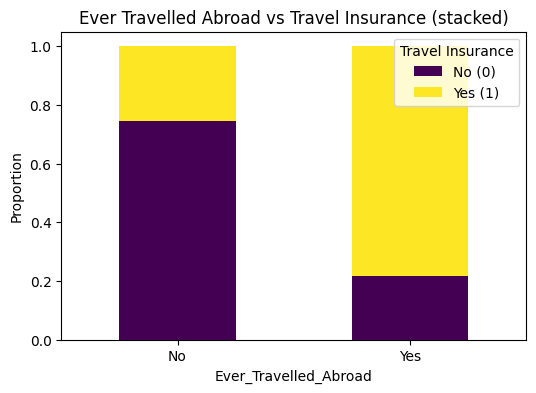

In [ ]:
# Stacked bar chart for Ever_Travelled_Abroad
ct_abroad = pd.crosstab(df['Ever_Travelled_Abroad'], df['Travel_Insurance'], normalize='index')
ct_abroad.plot(kind='bar', stacked=True, figsize=(6, 4), colormap='viridis')
plt.title('Ever Travelled Abroad vs Travel Insurance (stacked)')
plt.ylabel('Proportion')
plt.xticks(rotation='horizontal')
plt.legend(title='Travel Insurance', labels=['No (0)', 'Yes (1)'])
plt.show()

2. Frequent_Flyer: Similar to 'Ever_Travelled_Abroad', customers who are frequent flyers are considerably more likely to buy travel insurance.

Supporting Visualization: The stacked bar chart for 'Frequent_Flyer'.

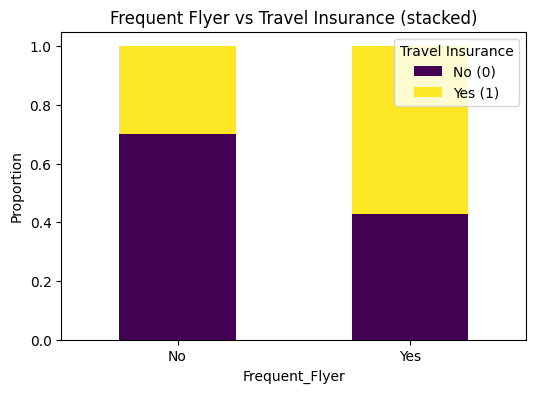

In [ ]:
# Stacked bar chart for Frequent_Flyer
ct_flyer = pd.crosstab(df['Frequent_Flyer'], df['Travel_Insurance'], normalize='index')
ct_flyer.plot(kind='bar', stacked=True, figsize=(6, 4), colormap='viridis')
plt.title('Frequent Flyer vs Travel Insurance (stacked)')
plt.ylabel('Proportion')
plt.xticks(rotation='horizontal')
plt.legend(title='Travel Insurance', labels=['No (0)', 'Yes (1)'])
plt.show()

3. Annual_Income: The box plot of 'Annual_Income' segmented by 'Travel_Insurance' show that customers who buy insurance tend to have a higher annual income. The correlation heatmap also shows a moderate positive correlation between 'Annual_Income' and 'Travel_Insurance'.

Supporting Visualization: Box plot and Heat map.

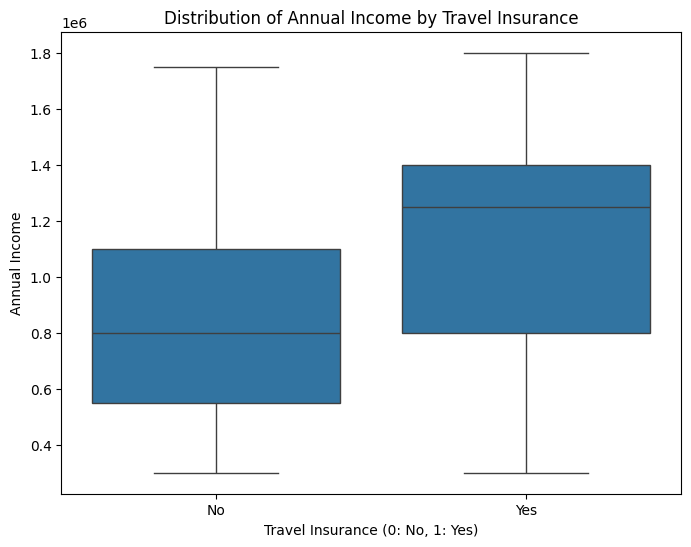

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Box plot for Annual_Income vs Travel_Insurance
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Travel_Insurance', y='Annual_Income')
plt.title('Distribution of Annual Income by Travel Insurance')
plt.xlabel('Travel Insurance (0: No, 1: Yes)')
plt.ylabel('Annual Income')
plt.xticks([0, 1], ['No', 'Yes']) # Set custom tick labels on the x-axis
plt.show()

Features that appear to have less impact include 'Age', 'Graduate_Or_Not', and 'Chronic_Diseases', as their distributions or relationship with 'Travel_Insurance' were less pronounced in the visualizations.

### 2.2 The Naive Bayes classifier assumes feature independence. Do you think this assumption holds for this dataset? Justify your answer.

Based on the analysis, the assumption of feature independence in the Naive Bayes classifier likely does not fully hold for this dataset, though the extent of dependence varies.

For numerical features like 'Age', 'Annual Income', and 'Family Members', the correlation heatmap showed very low linear correlations, suggesting a reasonable degree of independence among these specific numerical variables.

However, for categorical features, and the relationships between numerical and categorical features, dependencies are more probable:

1.  Annual Income and Employment Type/Age: The multi-modal distribution of 'Annual Income' observed in the KDE plot suggests there might be distinct subgroups within the dataset with different income patterns. These subgroups could be related to 'Employment Type' (e.g., government vs. private sector incomes) or 'Age' (e.g., income growth with experience). This indicates a potential dependency between 'Annual Income' and these categorical features.

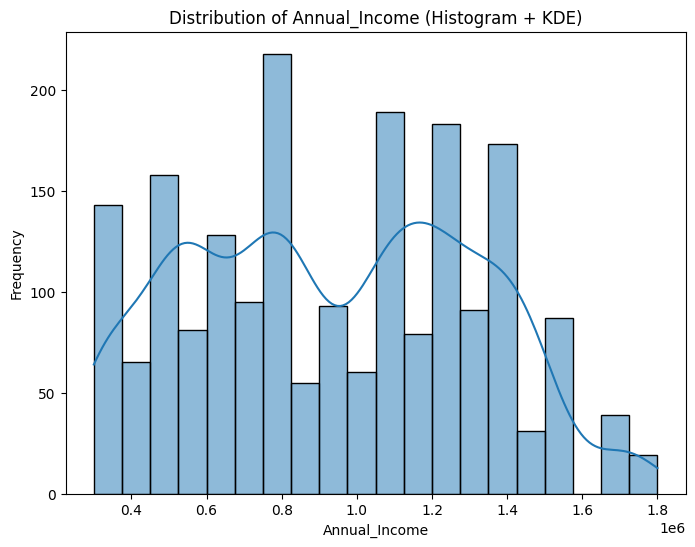

In [ ]:
# Filter for only Annual_Income for the histogram
numerical_cols_income = ['Annual_Income']

for col in numerical_cols_income:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=df, x=col, kde=True, bins=20)
    plt.title(f'Distribution of {col} (Histogram + KDE)')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()


2.  Ever_Travelled_Abroad and Frequent_Flyer: It is highly plausible that customers who are 'Frequent Flyers' are also more likely to have 'Ever Travelled Abroad'. These two features are intuitively related, and their strong individual correlations with 'Travel_Insurance' suggest they might also be correlated with each other.


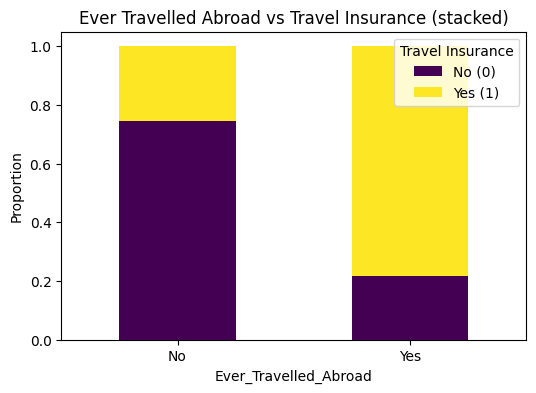

In [ ]:
# Stacked bar chart for Ever_Travelled_Abroad
ct_abroad = pd.crosstab(df['Ever_Travelled_Abroad'], df['Travel_Insurance'], normalize='index')
ct_abroad.plot(kind='bar', stacked=True, figsize=(6, 4), colormap='viridis')
plt.title('Ever Travelled Abroad vs Travel Insurance (stacked)')
plt.ylabel('Proportion')
plt.xticks(rotation='horizontal')
plt.legend(title='Travel Insurance', labels=['No (0)', 'Yes (1)'])
plt.show()

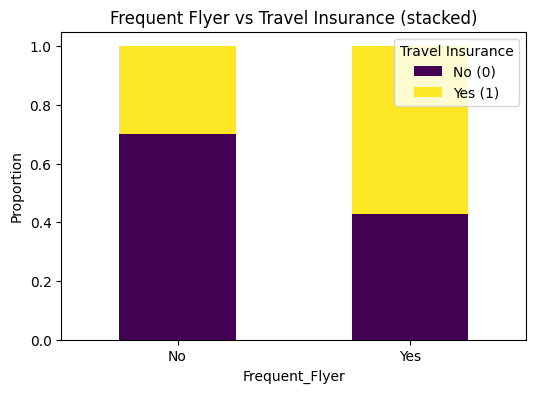

In [ ]:
# Stacked bar chart for Frequent_Flyer
ct_flyer = pd.crosstab(df['Frequent_Flyer'], df['Travel_Insurance'], normalize='index')
ct_flyer.plot(kind='bar', stacked=True, figsize=(6, 4), colormap='viridis')
plt.title('Frequent Flyer vs Travel Insurance (stacked)')
plt.ylabel('Proportion')
plt.xticks(rotation='horizontal')
plt.legend(title='Travel Insurance', labels=['No (0)', 'Yes (1)'])
plt.show()

In real-world scenarios, features are often interdependent. While this dataset shows some indications of dependencies, particularly among categorical features and their relationships with numerical ones, Naive Bayes can still perform reasonably well even when the independence assumption is violated, especially if the dependencies are not strong or if the model is used as a baseline. The relatively decent performance of the Gaussian Naive Bayes model on this dataset, despite the likely dependencies, supports this.

### 2.3 Did you observe any surprising patterns or trends in the dataset while exploring the data? Provide examples and possible explanations.

Several patterns and trends were observed during the data exploration phase:

1.  **Narrow Age and Family Member Distribution:** It was slightly surprising to see that the dataset is heavily concentrated on individuals between 25 and 35 years old, and primarily with 2 to 6 family members. This suggests the dataset might not be representative of a broader population, potentially limiting the generalizability of a model trained on this data.



/tmp/ipython-input-510598081.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Age', palette='viridis')


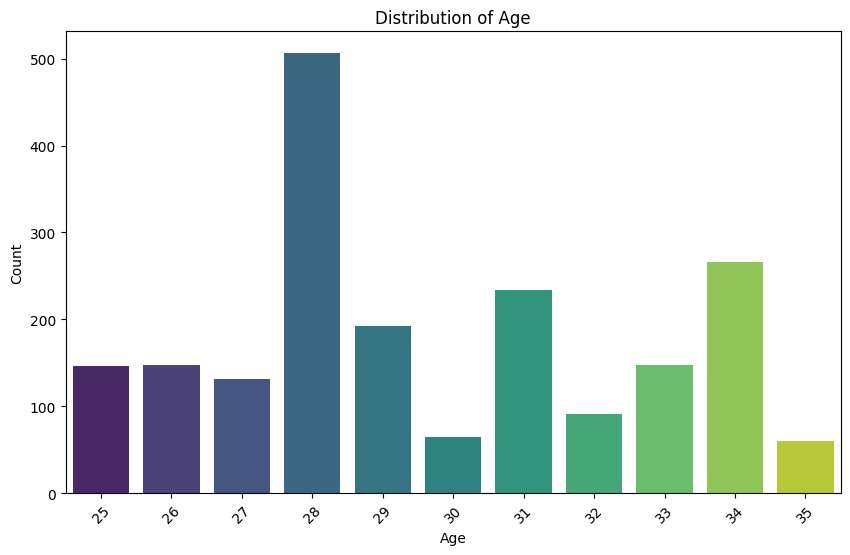

In [ ]:

# Count plot for Age
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Age', palette='viridis')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.xticks(rotation=45) # Rotate x-axis labels if they overlap
plt.show()

/tmp/ipython-input-2939849547.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Family_Members', palette='viridis')


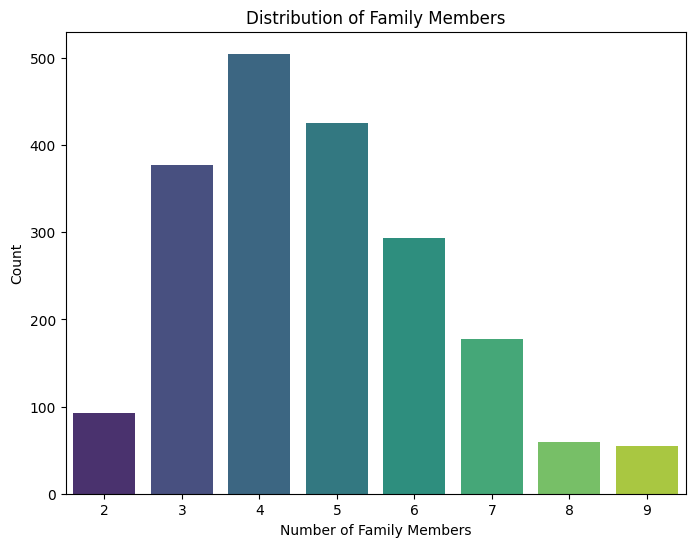

In [ ]:
# Count plot for Family_Members
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Family_Members', palette='viridis')
plt.title('Distribution of Family Members')
plt.xlabel('Number of Family Members')
plt.ylabel('Count')
plt.show()

   *   *Supporting Visualization:* Bar charts for 'Age' and 'Family_Members'.

2.  **Class Imbalance in Travel_Insurance:** The significant imbalance in the target variable, where far fewer customers purchased travel insurance than did not, was a notable observation. This imbalance needs to be addressed during model training and evaluation to avoid biased models.

    *   *Supporting Visualization:* Bar chart for 'Travel_Insurance' distribution.


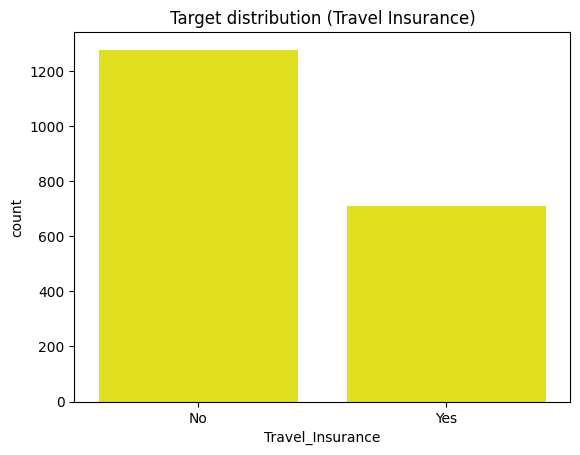

In [ ]:
sns.countplot(data=df, x="Travel_Insurance", color = "yellow")
plt.title("Target distribution (Travel Insurance)")
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

3.  **Strong Indicators: Ever_Travelled_Abroad and Frequent_Flyer:** The very clear difference in travel insurance purchase rates based on whether someone has traveled abroad or is a frequent flyer was a strong pattern. This is intuitive, as these individuals are more likely to travel and thus need insurance, but the magnitude of the difference was quite striking.

    *   *Supporting Visualization:* Stacked bar charts for 'Ever_Travelled_Abroad' and 'Frequent_Flyer' vs 'Travel_Insurance'.

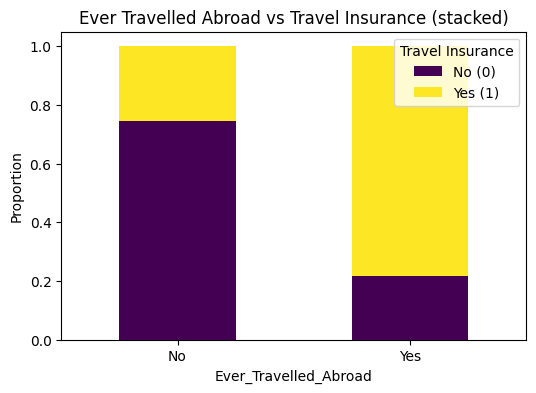

In [ ]:
# Stacked bar chart for Ever_Travelled_Abroad
ct_abroad = pd.crosstab(df['Ever_Travelled_Abroad'], df['Travel_Insurance'], normalize='index')
ct_abroad.plot(kind='bar', stacked=True, figsize=(6, 4), colormap='viridis')
plt.title('Ever Travelled Abroad vs Travel Insurance (stacked)')
plt.ylabel('Proportion')
plt.xticks(rotation='horizontal')
plt.legend(title='Travel Insurance', labels=['No (0)', 'Yes (1)'])
plt.show()

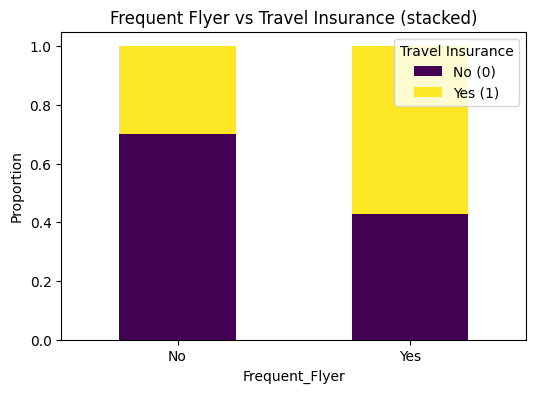

In [ ]:
# Stacked bar chart for Frequent_Flyer
ct_flyer = pd.crosstab(df['Frequent_Flyer'], df['Travel_Insurance'], normalize='index')
ct_flyer.plot(kind='bar', stacked=True, figsize=(6, 4), colormap='viridis')
plt.title('Frequent Flyer vs Travel Insurance (stacked)')
plt.ylabel('Proportion')
plt.xticks(rotation='horizontal')
plt.legend(title='Travel Insurance', labels=['No (0)', 'Yes (1)'])
plt.show()

4.  **Annual Income Distribution:** The multi-modal appearance in the Annual Income distribution (as seen in the KDE plot) was interesting. While not explicitly analyzed as distinct groups, it could suggest underlying segments within the customer base with different income structures (e.g., different job roles or career stages).

    *   *Supporting Visualization:* Histogram + KDE plot for 'Annual_Income'.

These observations highlight the specific characteristics of this dataset and the potential factors influencing travel insurance purchase within this surveyed group.

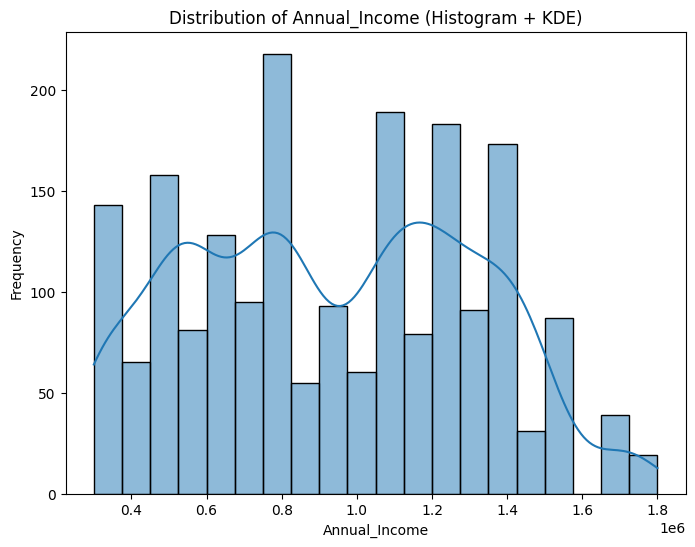

In [ ]:
# Filter for only Annual_Income for the histogram
numerical_cols_income = ['Annual_Income']

for col in numerical_cols_income:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=df, x=col, kde=True, bins=20)
    plt.title(f'Distribution of {col} (Histogram + KDE)')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

### 2.4 How did tuning the var_smoothing parameter affect the performance of GaussianNB? What strategy did you use to find the best value?

**Effect of the var_smoothing Parameter in GaussianNB:**

The var_smoothing parameter in Gaussian Naive Bayes adds a small value to the variance of each feature for each class, preventing zero probabilities and improving numerical stability. This acts as a form of Laplace smoothing.

- Small var_smoothing (e.g., close to 1e-9): Provides minimal smoothing, making the model more sensitive to the training data and potentially prone to overfitting or zero-variance issues.

- Large var_smoothing: Increases smoothing, reducing sensitivity to noise in the training data. While this can introduce bias, it often reduces variance and improves generalization on unseen data.

**Hyperparameter Tuning Strategy:**

To identify the optimal value for var_smoothing, a Grid Search with 5-fold Cross-Validation was conducted:

1. Parameter Grid: Values were drawn from np.logspace(0, -9, num=100).
2. Cross-Validation: The dataset was split into 5 folds. For each candidate value, the model was trained on 4 folds and validated on the remaining fold, repeated 5 times.
3. Evaluation Metric: Accuracy was used as the performance measure.
4. GridSearchCV Automation: The process was automated using GridSearchCV, which tracked the average validation score across folds for each candidate value.
5. Best Parameter Selection: The value achieving the highest average accuracy was selected.

**Results and Interpretation:**

The optimal var_smoothing value was found to be 1.0, yielding a cross-validation accuracy of approximately 0.7709.

Intuitively, this means the dataset benefited from heavier smoothing. In practice, the feature distributions may have been noisy or sparse for certain classes, making small variances unreliable. By setting var_smoothing = 1.0, the model avoided overreacting to these small fluctuations and instead captured the broader trend of the data. This reduced variance in the predictions and improved overall generalization.

The corresponding code was implemented in **Section 1.3.**

### 2.5 Do you think this dataset is sufficient for accurately predicting travel insurance purchases? What additional data points would you collect to improve prediction accuracy?

Based on the analysis, while the dataset provides some valuable insights and allows for model building, it is likely **not entirely sufficient** for highly accurate and generalizable prediction of travel insurance purchases. Here's why:

1.  **Class Imbalance:** The significant class imbalance (more non-buyers than buyers) makes it challenging to build a model that performs equally well for both classes, particularly in achieving high recall for the minority class (identifying actual buyers).
2.  **Limited Feature Set:** While the existing features are relevant, they might not capture all the nuances of a customer's decision to purchase travel insurance.
3.  **Narrow Demographic Range:** The concentration of the dataset on a specific age range (25-35) and family size (2-6) limits the model's ability to generalize to a broader population.

**Additional Data Points to Improve Prediction Accuracy:**
To improve the accuracy and generalizability of the prediction model, I would collect the following additional data points:

1.  **Travel History Details:**
    *   **Frequency and Recency of Travel:** More detailed information on how often a customer travels and when their last trip was.
    *   **Type of Travel:** (e.g., business, leisure, adventure) as different types of travel might have different risk profiles and insurance needs.
    *   **Destinations:** (e.g., domestic vs. international, specific countries or regions) as travel to certain areas might be perceived as higher risk.
    *   **Trip Duration:** Longer trips might increase the perceived need for insurance.
2.  **Behavioral and Engagement Data:**
    *   **Website/App Activity:** How the customer interacts with travel booking websites or insurance platforms (e.g., time spent browsing, pages visited, search queries).
    *   **Response to Promotions/Offers:** Whether the customer has responded to previous travel or insurance-related marketing.
3.  **Risk Aversion/Health Profile:**
    *   **Self-declared Risk Aversion:** While sensitive, a customer's indication of how risk-averse they are could be a strong predictor.
    *   **More Detailed Health Information:** Beyond just "Chronic Diseases," more specific health conditions or recent medical history (with appropriate privacy considerations).
4.  **Insurance History:**
    *   **Previous Insurance Purchases:** Whether the customer has purchased travel insurance or other types of insurance before.
    *   **Claims History:** Past insurance claims, which could indicate risk behavior or a history of valuing insurance protection.
5.  **Socioeconomic Factors (with consent and privacy):**
    *   **Household Composition Details:** Beyond just family members, understanding if there are dependents or elderly individuals.
    *   **Education Level:** While not a strong indicator in the current dataset, in a broader context, it could play a role.
6.  **External Factors:**
    *   **Time of Year/Seasonality:** Travel insurance purchases might be seasonal or related to specific travel periods.
    *   **Global Events/Travel Advisories:** Major events or health crises can significantly impact travel and insurance purchasing behavior.

Collecting these additional data points would provide a more comprehensive view of the customer's travel habits, risk profile, and insurance needs, which could significantly improve the accuracy and robustness of a travel insurance prediction model. Of course, ethical considerations and data privacy would be paramount when collecting and using such sensitive information.